# Testing of new infrastructure in sandbox.py

In [22]:
import os,sys
#sys.path.append('/home/miguel/PycharmProjects/open_AR_Sandbox')
sys.path.append('..')
sys.path.append('../../../gempy-1.16/')
sys.path.append("/Users/simon/Documents/coding/git/gempy")
sys.path.append('../../sandbox')

import matplotlib.pyplot as plt

import sandbox as sb
import sandbox_new as sbn

#import gempy as gp
#import gempy_sandbox as gpsb
from PIL import Image, ImageDraw
import pickle
import numpy as np
#from time import sleep
#import threading
import param

### Sensor Test

In [23]:
calib = sb.CalibrationData(file='calibration.json')

JSON configuration loaded.


In [38]:
projector = sb.Projector(calib)

<Figure size 432x288 with 0 Axes>

In [25]:
sensor = sb.DummySensor(calib, depth_limits=(500,2000))

DummySensor initialized.


In [15]:
#sensor = sb.KinectV2(calib)

## Topography Module

In [39]:
module = sb.TopoModule(calib, sensor, projector,  crop=True)

In [40]:
module.setup()

../../sandbox/sandbox.py:1253: UserWarning: No contour levels were found within the data range.
  linewidths=self.contours_width,


In [20]:
module.update()

In [21]:
module.run()

Thread started or resumed...


In [ ]:
module.stop()

## Calibration Module

In [16]:
calibration = sb.CalibModule(calib, sensor, projector)

<Figure size 432x288 with 0 Axes>

In [17]:
calibration.setup()

In [18]:
calibration.update()

In [20]:
calibration.run()

Thread started or resumed...


In [21]:
calibration.stop()

Thread stopped.


Tabs
    [0] Column
        [0] Markdown(str)
        [1] WidgetBox(css_classes=['widget-box'])
            [0] IntSlider(end=780, name='Projector top margin')
            [1] IntSlider(end=1260, name='Projector left margin', value=52)
            [2] IntSlider(end=1280, name='Projector frame width', start=10, value=1084)
            [3] IntSlider(end=800, name='Projector frame height', start=10, value=764)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] WidgetBox(css_classes=['widget-box'])
                [0] IntSlider(bar_color='#084C61', end=424, name='Sensor top margin', value=124)
                [1] IntSlider(bar_color='#084C61', end=512, name='Sensor right margin', value=67)
                [2] IntSlider(bar_color='#084C61', end=424, name='Sensor bottom margin', value=48)
                [3] IntSlider(bar_color='#084C61', end=512, name='Sensor left margin', value=116)
                [4] IntSlider(bar_color='#DBD053', end=2000, name='Vertical minimum', value=1049)
                [5] IntSlider(bar_color='#DB3A34', end=2000, name='Vertical maximum', value=1359)
                [6] Button(name='Refresh sensor f...)
            [1] Matplotlib(Figure, height=335)
    [2] WidgetBox(css_classes=['widget-box'])
        [0] TextInput(name='Choose a calibration f..., value='calibration.json')
        [1] Button(name='Save calibration')
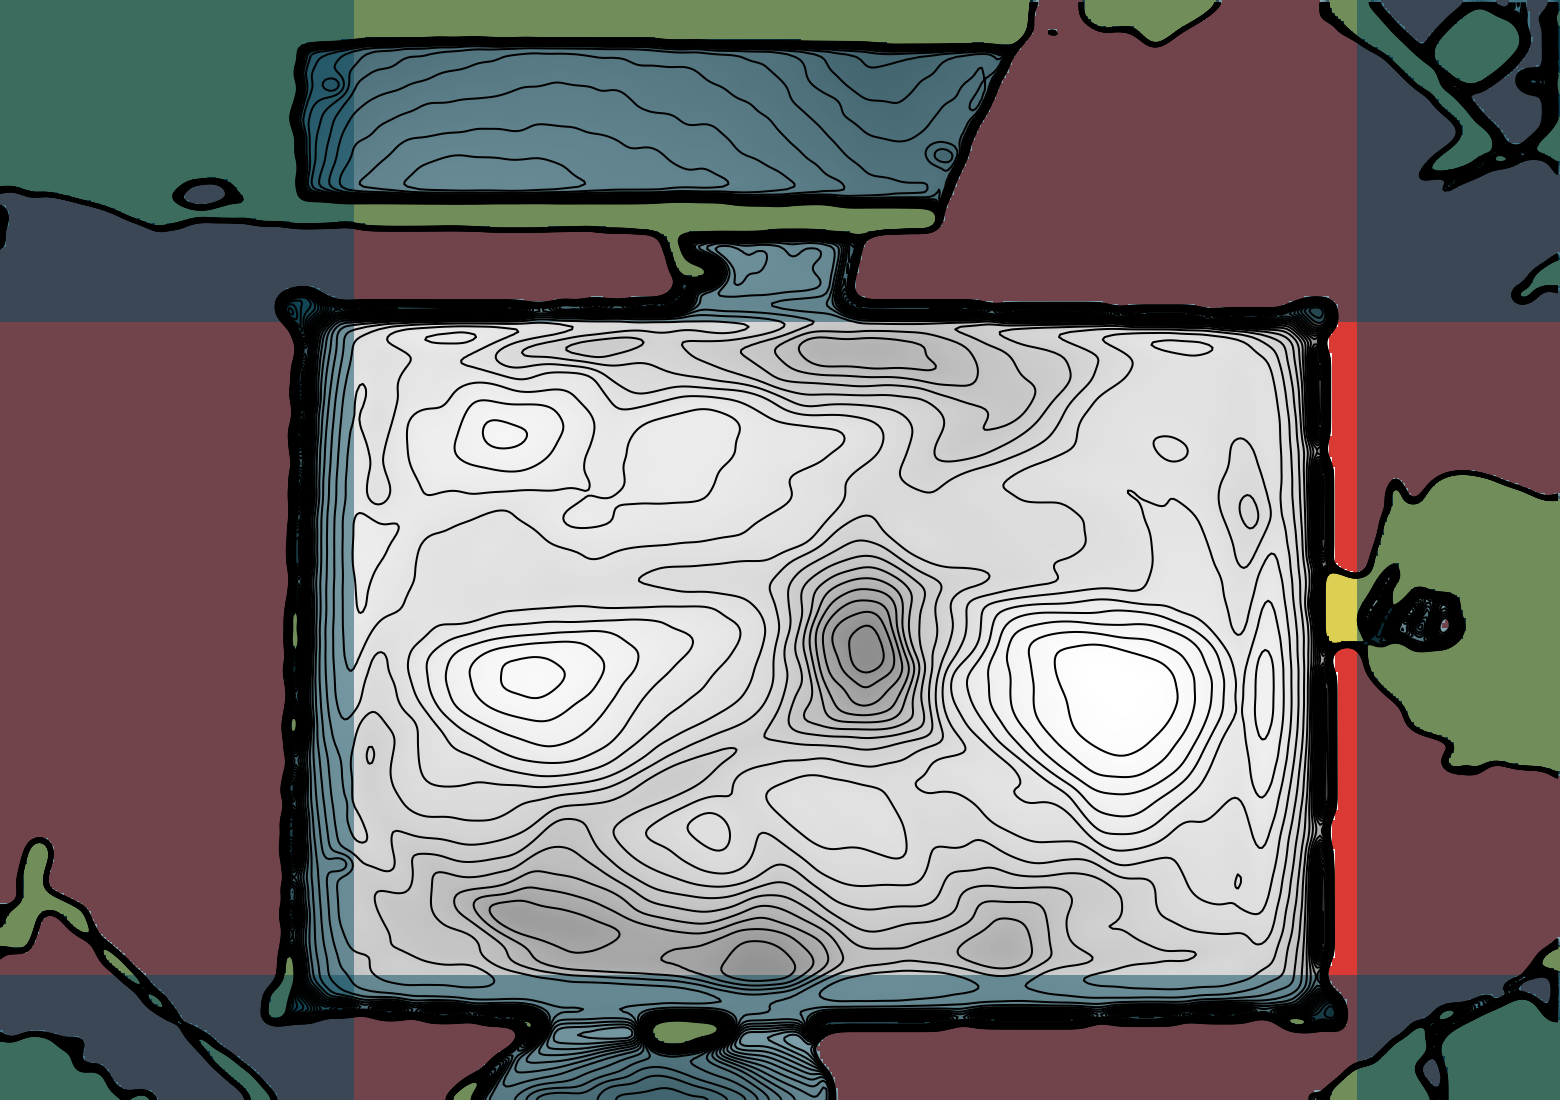

In [19]:
calibration.calibrate()

### Save calibration

In [ ]:
calib.__dict__

In [ ]:
calib.save_json()

## Block Module

In [22]:
module = sb.BlockModule(calib, sensor, projector)

In [23]:
module.load_model_vip("../../grids_do_not_push/VIP_for_UKA.corp")
module.load_single_block_file('../../grids_do_not_push/VIP_ntg_fluid.fluid.inc',"fluid", module.block_dict, 120, 166, 105)
module.load_single_block_file('../../grids_do_not_push/VIP_ntg_fluid.ntg.inc',"ntg", module.block_dict, 120, 166, 105, values_per_line=4)
module.block_dict.keys()

['C', 'Size', 'of', 'corner', 'point', 'grid', '(cols,rows,layers)']
120 166 105
Livecells loaded
done
done


dict_keys(['FaultBlock', 'Zone', 'fluid', 'ntg'])

In [25]:
module.set_colormap('fluid',cmap=module.create_cmap(['blue','green','red']),norm=module.create_norm(0,2))
module.set_colormap('ntg',cmap=module.create_cmap(['green','yellow']),norm=module.create_norm(0.0,1.0))
module.set_colormaps()

In [27]:
module.setup()

In [26]:
#module.rescaled_data_mask=None
module.displayed_dataset_key='ntg'

In [ ]:
module.update()

In [31]:
module.run()

Thread started or resumed...


In [29]:
module.show_selector()

RadioButtonGroup(button_type='success', name='Model selector', options=['FaultBlock', ...], value='FaultBlock')

In [30]:
module.stop()

Thread stopped.


In [ ]:
module.cmap_dict['fluid'][0]